# Agglomerative Clustering Algorithm

Agglomerative Clustering is a **hierarchical clustering technique** that builds nested clusters in a **bottom-up approach**. Initially, each data point is treated as an individual cluster, and pairs of clusters are merged iteratively based on some similarity criteria until only one cluster or a specified number of clusters remain.

---

## Key Characteristics

1. **Bottom-Up Approach**:
   - Start with each data point as its own cluster.
   - Merge the closest clusters iteratively.

2. **Dendrogram**:
   - The process can be visualized using a dendrogram, which shows how clusters are merged at each step.

3. **Linkage Criteria**:
   - Different linkage methods determine how distances between clusters are computed:
     - **Single Linkage**: Minimum distance between points in two clusters.
     - **Complete Linkage**: Maximum distance between points in two clusters.
     - **Average Linkage**: Average distance between all points in two clusters.
     - **Ward’s Linkage**: Minimize the variance within clusters.

---

## Why Use Agglomerative Clustering?

- **Handles Non-Convex Shapes**: Unlike K-Means, it does not assume a predefined shape for clusters.
- **No Need to Specify Initial Centroids**: The algorithm is deterministic for a given linkage criterion.
- **Produces a Hierarchical Structure**: Useful for understanding the data's underlying structure.

---

## Steps of the Algorithm

1. **Start**: Treat each data point as a separate cluster.
2. **Calculate Distances**: Compute a distance matrix between clusters.
3. **Merge Clusters**:
   - Identify the closest clusters based on the chosen linkage criteria.
   - Merge them into a single cluster.
4. **Update Distance Matrix**: Recalculate distances between the newly formed cluster and other clusters.
5. **Repeat**: Continue until only one cluster or the desired number of clusters is formed.

---

## Distance Calculation

Given two clusters \(C_i\) and \(C_j\), the distance \(d(C_i, C_j)\) depends on the linkage method:

- **Single Linkage**:
  $$ d(C_i, C_j) = \min \{ d(x_p, x_q) : x_p \in C_i, x_q \in C_j \} $$

- **Complete Linkage**:
  $$ d(C_i, C_j) = \max \{ d(x_p, x_q) : x_p \in C_i, x_q \in C_j \} $$

- **Average Linkage**:
  $$ d(C_i, C_j) = \frac{1}{|C_i| \cdot |C_j|} \sum_{x_p \in C_i} \sum_{x_q \in C_j} d(x_p, x_q) $$

---

## Use Cases

- Gene clustering in bioinformatics.
- Customer segmentation in marketing.
- Document or text clustering.

---

## Advantages

- Does not require the number of clusters \(k\) to be specified beforehand.
- Can capture complex relationships between clusters.

## Limitations

- Computationally expensive for large datasets (\(O(n^3)\)).
- Sensitive to noise and outliers.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:

# Step 1: Compute the distance matrix
def calculate_distance_matrix(data):
    return cdist(data, data, metric='euclidean')


In [3]:

# Step 2: Perform Agglomerative Clustering
def agglomerative_clustering(data, n_clusters=3):
    # Step 2.1: Initialize clusters as individual points
    clusters = [[i] for i in range(len(data))]
    
    # Step 2.2: Initialize distance matrix
    distance_matrix = calculate_distance_matrix(data)
    
    # Step 2.3: Perform the agglomerative merging process
    while len(clusters) > n_clusters:
        # Find the two closest clusters
        min_distance = np.inf
        to_merge = (0, 0)
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                cluster_i = clusters[i]
                cluster_j = clusters[j]
                # Ward's Linkage: Calculate the variance
                cluster_i_points = data[cluster_i]
                cluster_j_points = data[cluster_j]
                distance = np.mean(cdist(cluster_i_points, cluster_j_points))
                
                if distance < min_distance:
                    min_distance = distance
                    to_merge = (i, j)
        
        # Merge the two closest clusters
        cluster_i, cluster_j = to_merge
        new_cluster = clusters[cluster_i] + clusters[cluster_j]
        clusters = [clusters[k] for k in range(len(clusters)) if k != cluster_i and k != cluster_j]
        clusters.append(new_cluster)
        
        # Update the distance matrix
        distance_matrix = calculate_distance_matrix(data)

    return clusters

In [4]:

# Step 3: Plot the results
def plot_clusters(data, clusters):
    plt.figure(figsize=(8, 6))
    for i, cluster in enumerate(clusters):
        cluster_points = data[cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')
    plt.title("Agglomerative Clustering")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.grid()
    plt.show()



In [13]:

# Step 4: Print the clusters
def print_clusters(clusters, data):
    for i, cluster in enumerate(clusters):
        print(f"Cluster {i+1}:")
        for point in data[cluster]:
            print(f"  {point}")
        print()

In [14]:
# Example dataset
data = np.array([[0, 1], [1, 3], [2, 2], [3, 5], [4, 7], [5, 8], [6, 8], [7, 9], [8, 10], [9, 12]])

# Perform Agglomerative Clustering to find 3 clusters
n_clusters = 3
clusters = agglomerative_clustering(data, n_clusters=n_clusters)

# Print the resulting clusters
print_clusters(clusters, data)


Cluster 1:
  [0 1]
  [1 3]
  [2 2]

Cluster 2:
  [ 9 12]
  [7 9]
  [ 8 10]

Cluster 3:
  [3 5]
  [4 7]
  [5 8]
  [6 8]



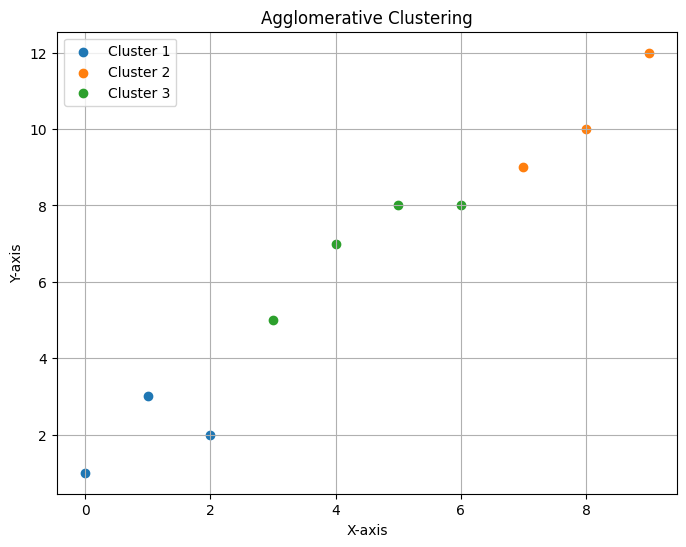

In [8]:

# Plot the resulting clusters
plot_clusters(data, clusters)


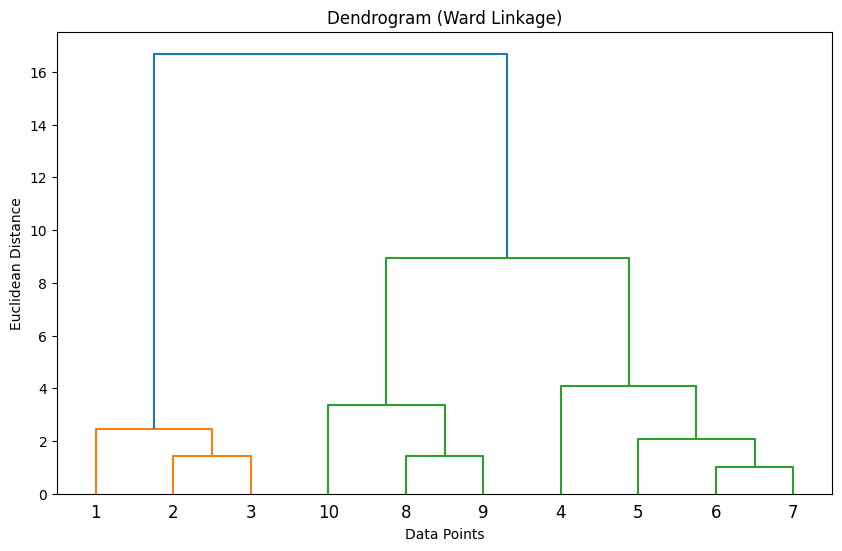

In [6]:
# Creating the linkage matrix for the dendrogram
linked = linkage(data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, labels=np.arange(1, len(data) + 1))
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


Clusters:
Cluster 1:
  [3 5]
  [4 7]
  [5 8]
  [6 8]

Cluster 2:
  [0 1]
  [1 3]
  [2 2]

Cluster 3:
  [7 9]
  [ 8 10]
  [ 9 12]



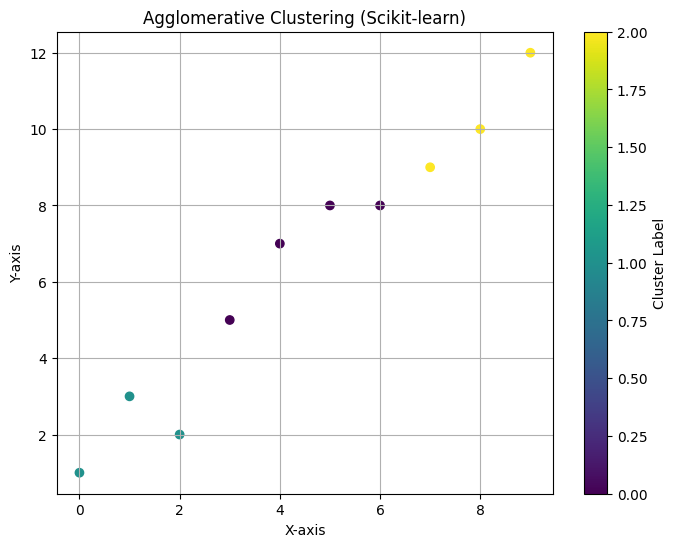

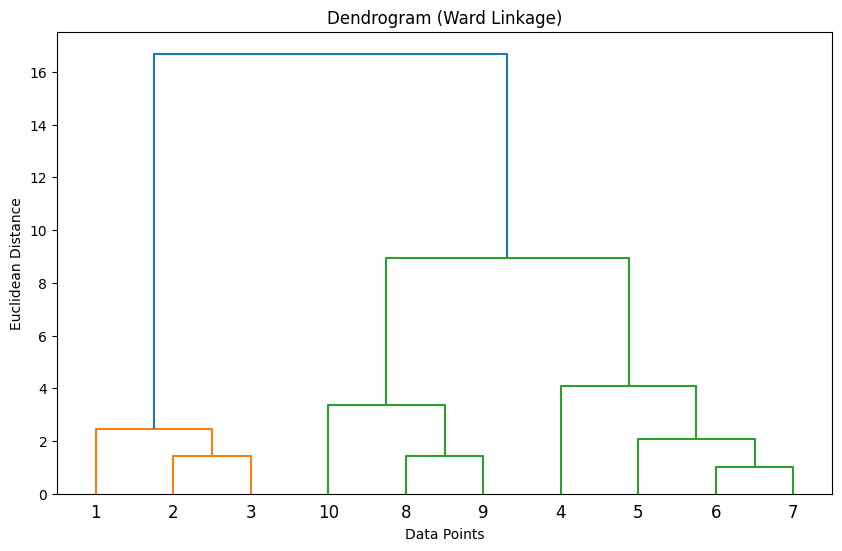

In [12]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Example dataset
data = np.array([[0, 1], [1, 3], [2, 2], [3, 5], [4, 7], [5, 8], [6, 8], [7, 9], [8, 10], [9, 12]])

# Step 1: Apply Agglomerative Clustering
n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')  # No affinity here for 'ward'


# Fit the model
agg_clustering.fit(data)


# Step 2: Print the Clusters
print("Clusters:")
for i in range(n_clusters):
    cluster_points = data[agg_clustering.labels_ == i]  # Select points for the current cluster
    print(f"Cluster {i + 1}:")
    for point in cluster_points:
        print(f"  {point}")
    print()  # Add a new line between clusters

# Step 3: Visualize the Clusters
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=agg_clustering.labels_, cmap='viridis')
plt.title("Agglomerative Clustering (Scikit-learn)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()

# Step 4: Dendrogram Visualization (Optional)
# Create the linkage matrix for the dendrogram
linked = linkage(data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, labels=np.arange(1, len(data) + 1))
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()
